 ###  Employees Salary Prediction

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import pipeline
from sklearn.externals import joblib


In [31]:
#importing data
df = pd.read_csv(r'C:\Users\chandan\Downloads\Salary_Data.csv')
df 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


###   Number of row and column

In [32]:
df.shape

(6704, 6)

In [33]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


###   showing first five dataset

In [34]:
# showing firat 5 data
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [35]:
#null value
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6699,False,False,False,False,False,False
6700,False,False,False,False,False,False
6701,False,False,False,False,False,False
6702,False,False,False,False,False,False


In [36]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [37]:
print(df.Gender.value_counts())

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64


In [38]:
print(df['Education Level'].value_counts())

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64


In [39]:
print(df['Job Title'].value_counts())

Job Title
Software Engineer                 518
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64


In [40]:
print(df['Years of Experience'].value_counts())

Years of Experience
2.0     610
3.0     602
1.0     540
4.0     522
6.0     439
8.0     426
5.0     399
9.0     380
7.0     353
11.0    320
12.0    294
14.0    253
16.0    242
13.0    209
10.0    192
15.0    129
18.0    126
19.0    121
0.0     120
17.0    106
20.0     61
22.0     47
21.0     42
23.0     37
25.0     24
24.0     19
28.0     16
29.0     12
1.5      12
27.0     11
32.0     10
26.0      7
30.0      6
33.0      6
31.0      5
34.0      2
0.5       1
Name: count, dtype: int64


In [41]:
print(df['Age'].value_counts())

Age
27.0    517
30.0    449
29.0    444
28.0    429
33.0    398
26.0    394
31.0    365
32.0    351
34.0    309
25.0    284
36.0    282
24.0    240
35.0    200
42.0    176
39.0    158
43.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
62.0      5
60.0      5
61.0      2
Name: count, dtype: int64


In [42]:
#Reducing job titles by omitting titles with less than 25 counts
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(144)

In [43]:
#Omitting titles with less than 25 counts
df['Job Title'] = df['Job Title'].apply(lambda x: 'others' if x in job_title_edited else x)
df['Job Title'].nunique()

50

In [44]:
#combining repeating values of education level
df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phd"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3023
Master's       1861
PhD            1368
High School     448
phD               1
Name: count, dtype: int64

In [45]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [46]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
#labelencoder = preprocessing.LabelEncoder()
labelencoder = LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])  # male = 1 , female=0
df['Education Level']=labelencoder.fit_transform(df['Education Level']) 
df['Job Title']=labelencoder.fit_transform(df['Job Title']) 
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,46,5.0,90000.0
1,28.0,0,2,2,3.0,65000.0
2,45.0,1,3,49,15.0,150000.0
3,36.0,0,0,33,7.0,60000.0
4,52.0,1,2,49,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,3,7,20.0,200000.0
6700,32.0,1,1,33,3.0,50000.0
6701,30.0,0,0,9,4.0,55000.0
6702,46.0,1,2,26,14.0,140000.0


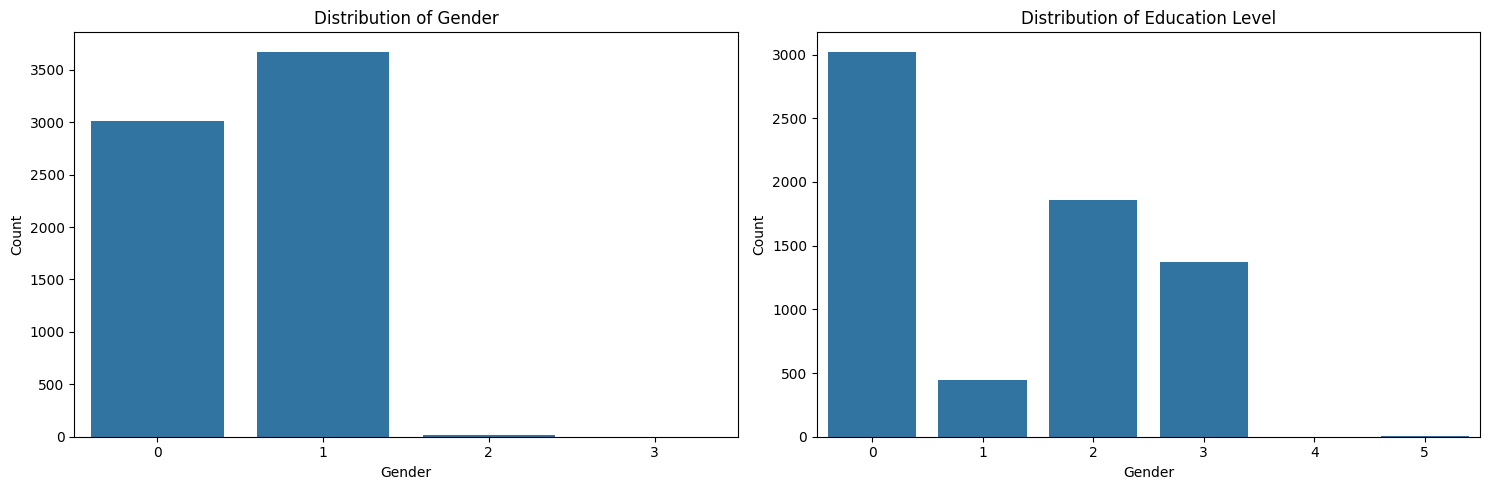

In [47]:
#create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#plot the count of data points for gender category in the first subplot
sns.countplot(x='Gender' , data=df, ax=ax[0])
#plot the count of the points for eacheducation level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

#add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

#show the plots
plt.tight_layout()
plt.show()

In [48]:
x=df.drop(columns=['Salary']) #input
y=df['Salary']#output

In [49]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6704, dtype: float64

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x


array([[0.26829268, 0.33333333, 0.        , 0.92      , 0.14705882],
       [0.17073171, 0.        , 0.4       , 0.04      , 0.08823529],
       [0.58536585, 0.33333333, 0.6       , 0.98      , 0.44117647],
       ...,
       [0.2195122 , 0.        , 0.        , 0.18      , 0.11764706],
       [0.6097561 , 0.33333333, 0.4       , 0.52      , 0.41176471],
       [0.12195122, 0.        , 0.2       , 0.7       , 0.02941176]],
      shape=(6704, 5))

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)
iris = datasets.load_iris()
x = iris.data
y = iris.target
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=23)


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('classifier',LogisticRegression())])

In [53]:
pipeline.fit(xtrain,ytrain)


,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'


In [54]:
y_pred = pipeline.predict(xtest)


In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:0.97


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)
y_pred1=knn.predict(xtest)
y_pred1



array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1])

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred1)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:1.00


In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
y_pred2=lr.predict(xtest)
y_pred2


array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred2)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:1.00


In [61]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam', hidden_layer_sizes=(5,2), random_state=2,max_iter=2000)
clf.fit(xtrain, ytrain)
predict3=clf.predict(xtest)
predict3


array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict3)

0.9666666666666667